In [1]:
import numpy as np
from matplotlib import pyplot as plt
import stim

from stim_lib.scheduled_circuit import get_amplitude_damping_probs

In [2]:
channels = ["I", "Z", "RZ"]

In [3]:
t1 = 15e3
durations = np.arange(1000, 20000, 1000)
probs = []
n_shots = 1000
for duration in durations:
    prob = 0
    p_I, p_Z, p_Rz = get_amplitude_damping_probs(duration, t1)
    
    _probs = np.array([p_I, abs(p_Z), p_Rz])
    _w = sum(_probs)
    _probs /=  _w
    for _ in range(n_shots):
        circ = stim.Circuit()
        circ.append_operation("X", [0])
        num = np.random.choice(3, 1, p=_probs)[0]
        if num != 0:
            circ.append_operation(channels[num], [0])
        circ.append_operation("M", [0])
        sampler = circ.compile_sampler()
        res = sampler.sample(shots=1)[0][0]
        if num == 1:
            prob -= res*_w
        else:
            prob += res*_w
    probs.append(prob/n_shots)     

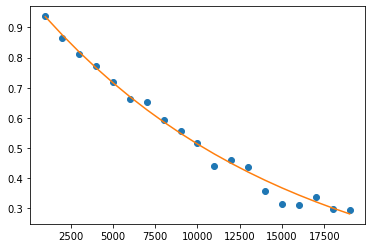

In [4]:
plt.plot(durations, probs, 'o')
plt.plot(durations, np.exp(-durations/t1))